<center>
  <h1> Analyse des Sentiments </h1>
</center>

# Importation des bibliothèques nécessaires

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#p2
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BYDEVMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BYDEVMAR\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

# 1: Exploration des données

## 1-1 Charger la dataset :

In [4]:
data = pd.read_csv('reviews.csv')

## 1-2 Aperçu des premières lignes

La commande `data.head()` permet d'afficher les cinq premières lignes de votre ensemble de données, offrant ainsi un aperçu rapide des informations contenues dans chaque colonne. Cela facilite la compréhension initiale de la structure des données que vous manipulez.

In [5]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## 1-3 Informations générales sur la dataset

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None


### Description des resultats :
La sortie de `data.info()` fournit des informations détaillées sur la structure de votre ensemble de données. Voici une description des résultats :

- **Type de l'objet :** `pandas.core.frame.DataFrame`
- **Index :** RangeIndex, allant de 0 à 568453, indiquant le nombre total d'entrées (lignes) dans l'ensemble de données.
- **Colonnes :** Il y a 10 colonnes au total.
- **Attributs et types de données :**
  - 'Id' est de type `int64` avec 568454 valeurs non nulles.
  - 'ProductId' est de type `object` (généralement une chaîne de caractères) avec 568454 valeurs non nulles.
  - 'UserId' est de type `object` avec 568454 valeurs non nulles.
  - 'ProfileName' est de type `object` avec 568428 valeurs non nulles (26 valeurs manquantes).
  - 'HelpfulnessNumerator' est de type `int64` avec 568454 valeurs non nulles.
  - 'HelpfulnessDenominator' est de type `int64` avec 568454 valeurs non nulles.
  - 'Score' est de type `int64` avec 568454 valeurs non nulles.
  - 'Time' est de type `int64` avec 568454 valeurs non nulles.
  - 'Summary' est de type `object` avec 568427 valeurs non nulles (27 valeurs manquantes).
  - 'Text' est de type `object` avec 568454 valeurs non nulles.

- **Mémoire utilisée :** Environ 43.4 MB.

- **Valeurs manquantes :** 'ProfileName' a 26 valeurs manquantes et 'Summary' a 27 valeurs manquantes.

Ces informations sont cruciales pour comprendre la composition de votre ensemble de données, y compris les types de données, la présence de valeurs manquantes, et la mémoire utilisée par l'ensemble de données.

## 1-4 Statistiques descriptives pour les attributs numériques

In [7]:
data['Score'].describe()

count    568454.000000
mean          4.183199
std           1.310436
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

### Description des resultats :
La sortie de la commande `data['Score'].describe()` fournit des statistiques descriptives spécifiques pour la colonne 'Score' de votre ensemble de données. Voici une description des résultats :

- **count :** Le nombre total d'observations dans la colonne 'Score' est de 568,454.

- **mean :** La moyenne (valeur moyenne) des scores dans la colonne 'Score' est d'environ 4.18.

- **std :** L'écart type, qui mesure la dispersion des scores autour de la moyenne, est d'environ 1.31.

- **min :** Le score minimum observé est 1.

- **25% :** Le premier quartile (Q1) est à 4, ce qui signifie que 25% des scores sont égaux ou inférieurs à 4.

- **50% :** La médiane (Q2) est à 5, ce qui indique que 50% des scores sont égaux ou inférieurs à 5.

- **75% :** Le troisième quartile (Q3) est à 5, ce qui signifie que 75% des scores sont égaux ou inférieurs à 5.

- **max :** Le score maximum observé est 5.

Ces statistiques fournissent un aperçu de la distribution des scores dans la colonne 'Score'. En l'occurrence, la plupart des scores semblent être concentrés autour des valeurs élevées, avec une moyenne de 4.18 et une médiane de 5. Cela suggère une tendance positive dans les évaluations.

# 2- Vérification des valeurs manquantes ou d'incohérences

## 2-1 Vérifier la présence de valeurs manquantes

In [8]:
print(data.isnull().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


### Description des resultats :
La sortie que vous avez présentée est le résultat de la commande `data.isnull().sum()` et indique le nombre de valeurs manquantes pour chaque colonne de votre ensemble de données. Voici une description des résultats :

- **'Id':** Aucune valeur manquante dans la colonne 'Id'.
  
- **'ProductId':** Aucune valeur manquante dans la colonne 'ProductId'.
  
- **'UserId':** Aucune valeur manquante dans la colonne 'UserId'.
  
- **'ProfileName':** Il y a 26 valeurs manquantes dans la colonne 'ProfileName'.
  
- **'HelpfulnessNumerator':** Aucune valeur manquante dans la colonne 'HelpfulnessNumerator'.
  
- **'HelpfulnessDenominator':** Aucune valeur manquante dans la colonne 'HelpfulnessDenominator'.
  
- **'Score':** Aucune valeur manquante dans la colonne 'Score'.
  
- **'Time':** Aucune valeur manquante dans la colonne 'Time'.
  
- **'Summary':** Il y a 27 valeurs manquantes dans la colonne 'Summary'.
  
- **'Text':** Aucune valeur manquante dans la colonne 'Text'.

Ces résultats vous indiquent les colonnes spécifiques qui ont des valeurs manquantes et le nombre de ces valeurs manquantes. C'est important pour décider comment traiter ces valeurs manquantes, que ce soit en les supprimant, en les remplaçant par des valeurs par défaut ou en utilisant d'autres méthodes de gestion des données manquantes en fonction du contexte de votre analyse.

## Vérifier les valeurs uniques dans chaque colonne

In [9]:
data.nunique()

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218415
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
dtype: int64

### Description des resultats :
La sortie de `data.nunique()` donne le nombre de valeurs uniques dans chaque colonne de votre ensemble de données. Voici une description des résultats pour chaque colonne :

- **'Id':** 568454 valeurs uniques.
  
- **'ProductId':** 74258 valeurs uniques.
  
- **'UserId':** 256059 valeurs uniques.
  
- **'ProfileName':** 218415 valeurs uniques.
  
- **'HelpfulnessNumerator':** 231 valeurs uniques.
  
- **'HelpfulnessDenominator':** 234 valeurs uniques.
  
- **'Score':** 5 valeurs uniques (ce qui est cohérent avec le fait que les scores sont souvent évalués sur une échelle discrète).
  
- **'Time':** 3168 valeurs uniques.
  
- **'Summary':** 295742 valeurs uniques.
  
- **'Text':** 393579 valeurs uniques.

Ces informations peuvent être utiles pour comprendre la diversité des données dans chaque colonne. Par exemple, dans la colonne 'Score', il y a seulement 5 valeurs uniques, indiquant probablement une échelle de notation restreinte. D'un autre côté, dans la colonne 'Text', il y a 393579 valeurs uniques, soulignant la variété des textes présents dans cet ensemble de données.

## Vérifier la distribution des scores 

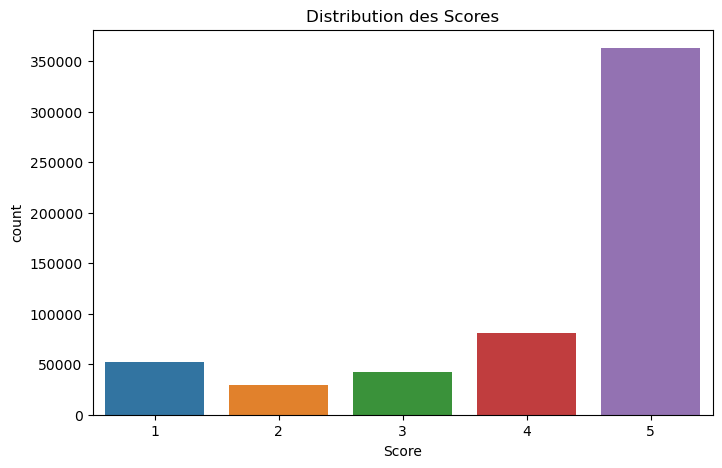

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Score', data=data)
plt.title('Distribution des Scores')
plt.show()

### Expliquons les résultats :

- **Score 5 :** Il y a 363,122 occurrences où le score est égal à 5.
  
- **Score 4 :** Il y a 80,655 occurrences où le score est égal à 4.

- **Score 1 :** Il y a 52,268 occurrences où le score est égal à 1.

- **Score 3 :** Il y a 42,640 occurrences où le score est égal à 3.

- **Score 2 :** Il y a 29,769 occurrences où le score est égal à 2.

Ces résultats donnent une vue détaillée de la distribution des scores dans votre ensemble de données. Par exemple, le score 5 est largement plus fréquent que les autres scores, suggérant que la majorité des évaluations sont positives. À l'inverse, les scores 1, 2 et 3 sont moins fréquents, indiquant une proportion plus faible d'évaluations négatives ou neutres. Cette information peut être utile pour comprendre la tendance générale des évaluations dans votre ensemble de données.

# Prétraitement des données :
## Supprimer les colonnes non pertinentes

In [11]:
colonnes_non_pertinentes = ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time']
data = data.drop(colonnes_non_pertinentes, axis=1)
data

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...
568449,5,Will not do without,Great for sesame chicken..this is a good if no...
568450,2,disappointed,I'm disappointed with the flavor. The chocolat...
568451,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,5,Favorite Training and reward treat,These are the BEST treats for training and rew...


## Gérer les valeurs manquantes

### Gérer les valeurs manquantes

In [14]:
data['Summary'] = data['Summary'].fillna('')

### Traitement du texte

In [ ]:
#Travailler sur les 5000 lignes
data = data.head(5000)

In [26]:
def preprocess_text(text):
    # Supprimer la ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convertir en minuscules
    text = text.lower()
    # Supprimer les stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Appliquer le prétraitement aux colonnes 'Summary' et 'Text' en utilisant .loc[]
data.loc[:, 'Summary'] = data['Summary'].apply(preprocess_text)
data.loc[:, 'Text'] = data['Text'].apply(preprocess_text)

# Afficher les premières lignes après le prétraitement
data.head()

,Score,Summary,Text
0,5,good quality dog food,bought several vitality canned dog food produc...
1,1,advertised,product arrived labeled jumbo salted peanutsth...
2,4,delight says,confection around centuries light pillowy citr...
3,2,cough medicine,looking secret ingredient robitussin believe f...
4,5,great taffy,great taffy great price wide assortment yummy ...


## Analyse Exploratoire des Données (EDA)

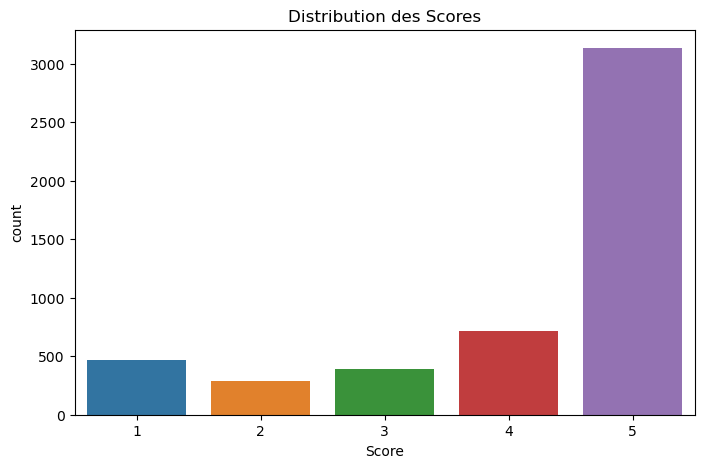

Statistiques descriptives pour chaque attribut pertinent :
               Score    Summary  \
count   5000.000000       5000   
unique          NaN       3954   
top             NaN  delicious   
freq            NaN         58   
mean       4.150400        NaN   
std        1.326549        NaN   
min        1.000000        NaN   
25%        4.000000        NaN   
50%        5.000000        NaN   
75%        5.000000        NaN   
max        5.000000        NaN   

                                                     Text  
count                                                5000  
unique                                               4983  
top     much white pith orange peel making product ove...  
freq                                                    3  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                

ValueError: could not convert string to float: 'bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better'

In [27]:
# Visualiser la distribution des scores
plt.figure(figsize=(8, 5))
sns.countplot(x='Score', data=data)
plt.title('Distribution des Scores')
plt.show()

# Explorer d'autres statistiques descriptives
descriptive_stats = data.describe(include='all')
print("Statistiques descriptives pour chaque attribut pertinent :\n", descriptive_stats)

# Vous pouvez également explorer la corrélation entre les attributs numériques
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()